# Chapter 6 - Decision Trees
## Pre-Exercise

In [5]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

In [6]:
data_import = pd.read_csv("clothing_size.csv")
data_import

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
...,...,...,...,...
119729,63,42.0,175.26,M
119730,45,29.0,154.94,S
119731,61,31.0,172.72,M
119732,74,31.0,167.64,XL


In [7]:
data_import["size"].value_counts()

M       29712
S       21924
XXXL    21359
XL      19119
L       17587
XXS      9964
XXL        69
Name: size, dtype: int64

In [8]:
data_step_one = data_import.copy()
data_step_one = data_step_one.dropna(axis=0)
dropped_rows = len(data_import) - len(data_step_one)
print("Rows Dropped: ", dropped_rows)

Rows Dropped:  581


In [9]:
data_step_one = data_step_one[data_step_one["size"] != "XXL"]
data_step_one

,weight,age,height,size
0,62,28.0,172.72,XL
1,59,36.0,167.64,L
2,61,34.0,165.10,M
3,65,27.0,175.26,L
4,62,45.0,172.72,M
...,...,...,...,...
119729,63,42.0,175.26,M
119730,45,29.0,154.94,S
119731,61,31.0,172.72,M
119732,74,31.0,167.64,XL


In [10]:
X = data_step_one[["weight", "age", "height"]]
y = data_step_one["size"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [12]:
def decision_tree_run(depth):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train, y_train)
    return tree_clf.score(X_test, y_test)
decision_tree_run(None)

0.5034098427400886

In [13]:
accuracy = []
tree_depth = list(range(2, 100, 3))

In [14]:
for i in tree_depth:
    accuracy.append(decision_tree_run(i))
accuracy

[0.446918418240114,
 0.5050638709349077,
 0.5140719629497684,
 0.5153442923303985,
 0.509058985190086,
 0.5061071810270242,
 0.503893327904728,
 0.5032826098020255,
 0.5033335029772508,
 0.5035370756781515,
 0.5035879688533768,
 0.5033080563896382,
 0.5033080563896382,
 0.503384396152476,
 0.5033589495648634,
 0.5034352893277012,
 0.5033589495648634,
 0.5032826098020255,
 0.5033589495648634,
 0.5033335029772508,
 0.5034607359153137,
 0.5032317166268003,
 0.5031808234515751,
 0.5033335029772508,
 0.5034352893277012,
 0.5033335029772508,
 0.5033589495648634,
 0.5034352893277012,
 0.5030281439258996,
 0.5034352893277012,
 0.5031808234515751,
 0.5032317166268003,
 0.5034352893277012]

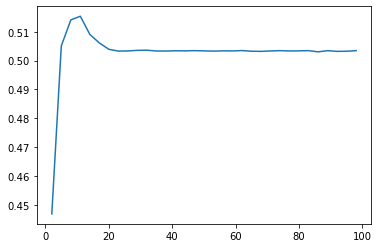

In [15]:
plt.plot(tree_depth, accuracy)

In [16]:
results = pd.DataFrame(data = {"Predictions":tree_clf.predict(X_test).tolist(), "Actuals": y_test.to_list()})
results["Matching"] = results.apply(lambda x: "Correct" if x["Predictions"] == x["Actuals"] else "Wrong", axis=1)

ValueError: X has 3 features, but DecisionTreeClassifier is expecting 2 features as input.

In [17]:
tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf.fit(X_train, y_train)

export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names = X_train.columns,
    rounded=True,
    filled=True
)

In [18]:
results = pd.DataFrame(data = {"Predictions":tree_clf.predict(X_test).tolist(), "Actuals": y_test.to_list()})
results["Matching"] = results.apply(lambda x: "Correct" if x["Predictions"] == x["Actuals"] else "Wrong", axis=1)
results

,Predictions,Actuals,Matching
0,XL,L,Wrong
1,M,S,Wrong
2,M,S,Wrong
3,XL,XXXL,Wrong
4,XL,L,Wrong
...,...,...,...
39293,S,XXS,Wrong
39294,M,L,Wrong
39295,S,XXS,Wrong
39296,L,XL,Wrong


In [19]:
correct_wrong_data = results.groupby(["Actuals", "Matching"])["Predictions"].count().reset_index()
correct_wrong_data["Labels"] = correct_wrong_data["Actuals"] + " - " + correct_wrong_data["Matching"]
correct_wrong_data["Colors"] = correct_wrong_data["Matching"].map(lambda x: "b" if x == "Correct" else "r")
correct_wrong_data

,Actuals,Matching,Predictions,Labels,Colors
0,L,Correct,1320,L - Correct,b
1,L,Wrong,4456,L - Wrong,r
2,M,Correct,5990,M - Correct,b
3,M,Wrong,3808,M - Wrong,r
4,S,Correct,3138,S - Correct,b
5,S,Wrong,4041,S - Wrong,r
6,XL,Correct,2585,XL - Correct,b
7,XL,Wrong,3722,XL - Wrong,r
8,XXS,Correct,1490,XXS - Correct,b
9,XXS,Wrong,1788,XXS - Wrong,r


<BarContainer object of 12 artists>

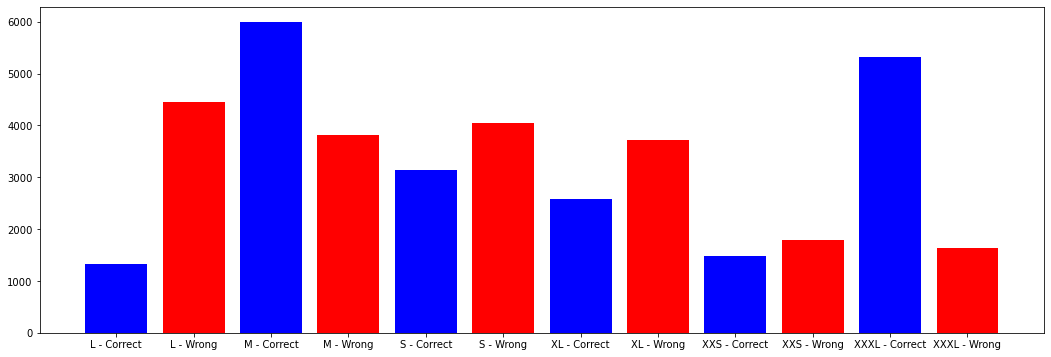

In [20]:
plt.figure(figsize=(18, 6))
fig = plt.bar(x=correct_wrong_data["Labels"], height=correct_wrong_data["Predictions"], color=correct_wrong_data["Colors"])
fig

In [21]:
confusion_matrix(y_test, tree_clf.predict(X_test).tolist(), labels=y_test.unique())

array([[1320,  192,  334,   14, 2245, 1671],
       [ 154, 3138,   26, 1084, 2709,   68],
       [ 237,   19, 5325,   18,  159, 1202],
       [   4, 1462,    3, 1490,  311,    8],
       [1121, 1641,   80,  193, 5990,  773],
       [1050,   92, 1431,    9, 1140, 2585]], dtype=int64)

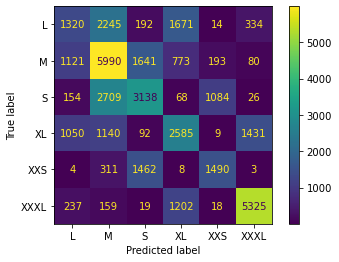

In [22]:
plot_confusion_matrix(tree_clf, X_test, y_test)

## Training and Visualizing a Decision Tree

In [28]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [29]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

In [30]:
import pydot

(graph,) = pydot.graph_from_dot_file('iris_tree.dot')
graph.write_png('iris_tree.png')

## Making Predictions
Root node: <br>
Leaf node: <br>
A node's samples attribute counts how many training instances it applies to. <br>
A node's value attribute tells you how many training instances of each class this node it applies to.
A node's ginit attribute measures it impurity. A node is "pure" (`gini=0`) if all training instances it applies to belong to the same class.

*Gini impurity*: $$G_{i} = 1 - \sum \limits _{k = 1}^{n}p_{i,k}^{2}$$

White box model: a model that is fairly intuitive and its decisions are easy to interpret. <br>
Black box model: a model that is usually hard to explain in simple terms why the predictions were made.

## Estimating Class Probabilities
A Decision Tree can also estimate the probability that an instance belongs to a particular class *k*.

In [31]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [32]:
tree_clf.predict([[5, 1.5]])

array([1])

## The CART Training Algorithm
Scikit-Learn uses the *Classification And Regression Tree* (Cart) algorithm to train Decision Tees. <br>
*CART cost function for classification* <br>
The CART algorithm splits the subsets recusively until it reaches the maximum depth or it cannot find a split that will reduce impurity. 

## Computational Complexity
Computational complexity of the Decision Tree when making predictions: $O(log_{2}(m))$ <br>
Computational complexity of the training algorithm: $O(n \times m log(m))$ <br>
For small training sets (less than a few thousand instances), Scikit_Learn can speed up training by presorting the data (set `presort=True`), but this slows down training considerably for larger training sets.


## Gini Impurity or Entropy?
In Machine Learning, entropy is frequently used as an impurity measure: a set's entropy is zero when it contains instances of only one class. <br>
Most of the time choosing between Gini impurity or entropy does not make a big difference.

## Regularization Hyperparameters
Nonparametric model: the number of parameters is not determined prior to training, so the model is free to stick closely to the data. (e.g. Decision Trees) <br>
Parametric model: it has a predetermined number of parameters, so its degree of freedom is limited, reducing the risk of overfitting (but increasing the risk of underfitting). (e.g. Linear model) <br>
Regularization hyperparameters of a Decision Tree (depend on the algorithm used): <br>
1. `max_depth`: the default is `None`, whic means unlimited. Reducing `max_depth` will regularize the model and thus the risk of overfitting.
2. `min_samples_split`: the minimum number of samples a node must have before it can be split.
3. `min_samples_leaf`: the minimum number of samples a leaf node must have
4. `min_weight_fraction_leaf`: same as `min_samples_leaf` but expressed as a fraction of the total number of weighted instances. 
5. `max_leaf_nodes`: maximum number of leaf nodes
6. `max_features`: maximum number of features that are evaluated for splitting at each node.

## Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X, y)

Instead of predicting a class in each node, it predicts a value. The prediction is simply the average target value of training instances associated to the leaf node. <br>
The CART algorithm tries to split the training set in a way that minimizes the MSE. <br>
Decision Trees are prone to overfitting when dealing with regression tasks.

## Instability
Limitations of Decision Trees:
1. Decision Trees love orthogonal decision boundaries (all splits are perpendicular to an axis), which makes them sensitive to training set rotation.
    - This problem can be limited by using PCA.
2. Decision Trees are very sensitive to small variations in the training data. 
    - Random Forests can limit this instability by averaging predictions over many trees.
